In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/var/folders/1b/b3lsjhy10fsd753tw_292d5w0000gn/T/ipykernel_47314/791318390.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Quarter'] = pd.to_datetime(df['Quarter'])


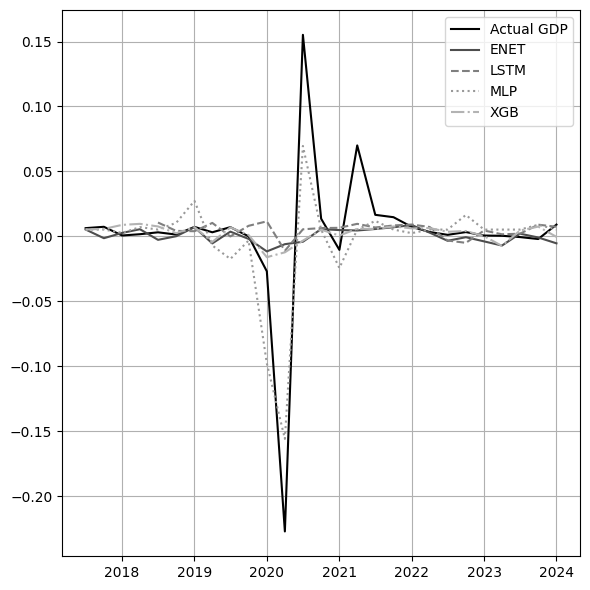

In [2]:
df = pd.read_csv("2_test_result_UK.csv")

# 1. Rename columns: strip "_Y_q" suffix
df = df.rename(columns=lambda col: col.replace("_Y_q", ""))
df = df.rename(columns={"Actual": "Actual GDP"})

# 2. Convert Quarter to datetime
df['Quarter'] = pd.to_datetime(df['Quarter'])

# 3. Melt into long format
melted_df = df.melt(id_vars="Quarter", var_name="Model", value_name="Value")

# 4. Define colors and line styles
model_colors = {
    "Actual GDP": "#000000",   # black
    "ENET": "#4D4D4D",         # gray30
    "LSTM": "#7F7F7F",         # gray50
    "MLP": "#999999",          # gray60
    "XGB": "#B3B3B3"           # gray70
}

model_linetypes = {
    "Actual GDP": "solid",
    "ENET": "solid",
    "LSTM": "dashed",
    "MLP": "dotted",
    "XGB": "dashdot"
}

# 5. Plot
plt.figure(figsize=(6, 6))
for model in melted_df['Model'].unique():
    temp_df = melted_df[melted_df['Model'] == model].dropna()
    plt.plot(temp_df['Quarter'], temp_df['Value'],
             label=model,
             color=model_colors.get(model, '#888888'),
             linestyle=model_linetypes.get(model, 'solid'))


plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("UK_test.pdf", bbox_inches='tight', dpi=500)
plt.show()
